<a href="https://colab.research.google.com/github/luis314159/portfolio/blob/master/machine/Arboles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<center>Universidad Autónoma de Chihuahua**

<div align= "center">
<img src="https://uach.mx/assets/media/snippet/62/escudo-web-header-black.svg" width="350" height="350" />

</div>
<div align ="center">
<img src="https://cimav.edu.mx/wp-content/uploads/2017/05/ingenieria-uach.png" width="200" height="200" />
</div>

##<center>Maestría en Ingeniería en Computación 
##<center>Machine learning
##<center>Arboles de Decisión
##<center>
###<center>Catedrático: Dr. Luis Carlos González Gurrola 
###<center>Estudiante: Ing. Luis Ángel Almazán López</center>



<center>
Ninguna pérdida debe sernos más sensible que la del tiempo, puesto que es irreparable.


$Zenón \ de\ Citio$

<!-- badges: start -->
[![@luis3.14159](https://img.shields.io/badge/@luis314159-gitHub-darkred?&logoColor=white)](https://github.com/luis314159/) 
[![Platzi](https://img.shields.io/badge/Platzi_count-luisangelalmaznlpez-green&logoColor=white)](https://platzi.com/p/luisangelalmaznlpez/)
![Email](https://img.shields.io/badge/email-p364977@uach.mx-darkblue?&logoColor=white)
<!-- badges: end -->


#Introducción 
Los arboles de decisiones son algoritmos de machine Learning que se caracterizan por su gran interpretabilidad, se puede pensar en estos como una descompocisión de los datos mediante una toma de decisiones basada en una serie de preguntas.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


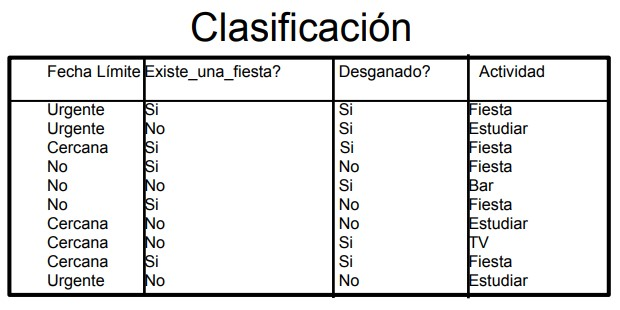

In [ ]:
#@title Ejemplo
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import Image 
Image("/content/drive/MyDrive/Machine_learning/arboles/datos.jpg")


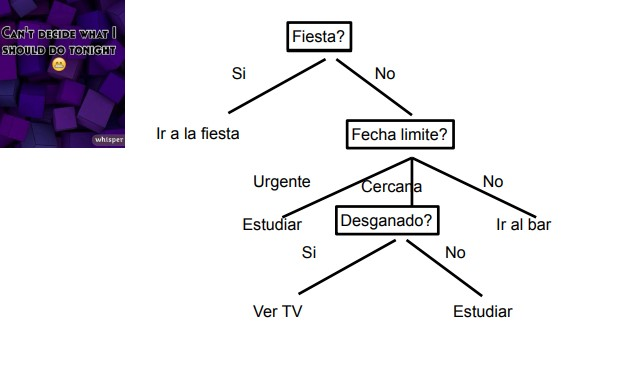

In [ ]:
#@title Ejemplo arbol
Image("/content/drive/MyDrive/Machine_learning/arboles/arbol.jpg")

#Implementación de funciones de entropía y ganancia de información 


##Entropía de Shannon
La entropía de Shannon permite medir la incertidumbre de un sistema, dicha entropía nos permite saber la cantidad de información que tiene un sistema, la cual se calcula de la siguiente manera:
<center>

$H(x)=-Σ_ip(x_i)log_2(p(x_i))$

###pseudo código


```
  def entropy(data,tarject):
  
    values={}
    #Para cada columna del data
    for colum in data.columns:
      #Contamos cuantos valores diferentes hay por features
      values[i]=data[i].value_counts()

    #Obtenemos las probabilidades de cada respuesta
    probabilities=prob(values[tarject])

    #Varaible entropia
    ent=0

    for value in probability:
      ent+=-value*self.log(value)

    return ent

 #Fucnion auxiliar de entropia
  def prob(data:dict):
    proba={}
    #Contamos los valores en el dataframe
    sum=data.count()

    for key,val in data:
      proba[key]=value/sum

    return proba

```



##Gananacia de información 

La ganancia de información nos permite saber que tan relevante es un feature en los datos.

Esto es útil para los arboles de decisiones por que nos permiten saber que features cortan más el conjunto de datos es decir conocer una medida de que tanta información obtenemos al conocer una variable, como en el ejemplo: 


*   Hay fiesta?
*   Desganado?
*   Trabajo urgente?

Esto nos permitira generar un mejor arbol de decisiones al saber con que información comensamos a separar en distintas categorias.

La ganancia de información se calcula de la siguiente manera:
<center>

$Gain(S,F)=Entropy(S)-Σ_{f∈values(F)}\dfrac{|S_f|}{S}Entropy(S_f)$



##Pseudo código



```
  def information_gain(label): 

    gain=entropy

    for key1,val1 in amount[label]:
      aux=0
      b=val1
      for key2,val2 in amount[tarject]:
        cond1=self.data[self.tarject]==key2

        cond2=self.data[label]==key1

        #Aqui se cuenta cuantos valores de la data cumplen las condiciones
        a=len(data[cond1 & cond2])
        if a!=0:
          aux+=self.s(a,b)
        
      gain -=(b/self.states)*aux
    return gain

  def s(self,a,b):
      c=a/b
      return -c*self.log(c)

```



###Código ejemplo:

In [ ]:
dict={"Fecha_limite":["Urgente","Urgente","Cercana","No","No","No","Cercana","Cercana","Cercana","Urgente"],
      "Existe_una_fiesta":["Si","No","Si","Si","No","Si","No","No","Si","No"],
      "Desganado":["Si","Si","Si","No","Si","No","No","Si","Si","No"],
      "Actividad":["Fiesta","Estudiar","Fiesta","Fiesta","Bar","Fiesta","Estudiar","Tv","Fiesta","Estudiar"]}

In [ ]:
#Importar librerías
import pandas as pd
#Dataframe del diccionario
df=pd.DataFrame(dict)


In [ ]:
df

,Fecha_limite,Existe_una_fiesta,Desganado,Actividad
0,Urgente,Si,Si,Fiesta
1,Urgente,No,Si,Estudiar
2,Cercana,Si,Si,Fiesta
3,No,Si,No,Fiesta
4,No,No,Si,Bar
5,No,Si,No,Fiesta
6,Cercana,No,No,Estudiar
7,Cercana,No,Si,Tv
8,Cercana,Si,Si,Fiesta
9,Urgente,No,No,Estudiar


In [ ]:

#Clase con datos de entropía y ganancia de información 
from math import log2 as log
class frame_statistics:
  

  def __init__(self,data:pd.DataFrame,tarject):
    self.data=data
    self.tarject=tarject
    self.states=len(self.data.index)
    self.log=log
    self.values,self.entropy =self.entropy()
    

  #Variable values guardara las cuantas veces se repite un estado por fila
  
  def entropy(self):
    values={}
    for i in self.data.columns:
      values[i]={}

      count=self.data[i].value_counts()
      for j,k in enumerate(count):
        ind=count.index[j]
        values[i][ind]=k

    
    #print(values)
    #Obtenemos las probabilidades de cada respuesta
    probabilities=self.prob(values[self.tarject])

    #Varaible entropia
    ent=0

    for i,j in probabilities.items():
      ent+=-j*self.log(j)


    return values,ent

 #Fucnion auxiliar de entropia
  def prob(self,data:dict):
    proba={}
    sum=0
    
    for i,j in data.items():
      proba[i]=j/self.states
    return proba


  def information_gain(self,label): 
    gain=self.entropy

    for i,j in self.values[label].items():
      aux=0
      b=j
      for k,h in self.values[self.tarject].items():
        cond1=self.data[self.tarject]==k

        cond2=self.data[label]==i


        a=len(self.data[cond1 & cond2])
        if a!=0:
          aux+=self.s(a,b)
        

      gain -=(b/self.states)*aux
    return gain


  def s(self,a,b):
      c=a/b
      return -c*self.log(c)


In [ ]:
statistics=frame_statistics(df,"Actividad")
print(f"Entropía: {statistics.entropy}")


Entropía: 1.6854752972273346


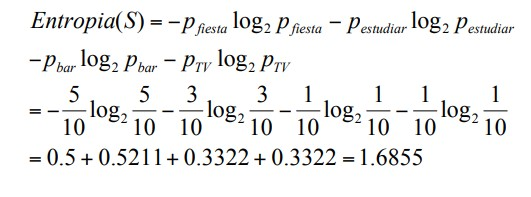

In [ ]:
#@title Comprobación de entropía
Image("/content/drive/MyDrive/Machine_learning/arboles/entropia2.jpg")


In [ ]:
des_gain=statistics.information_gain("Desganado")
fec_gain=statistics.information_gain("Fecha_limite")
exi_gain=statistics.information_gain("Existe_una_fiesta")

print(f'Ganancia de información de "Desganado": {des_gain}')
print(f'Ganancia de información de "Fecha limite": {fec_gain}')
print(f'Ganancia de información de "Existe una fiesta": {exi_gain}')

Ganancia de información de "Desganado": 0.20998654701098796
Ganancia de información de "Fecha limite": 0.5344977967946409
Ganancia de información de "Existe una fiesta": 1.0000000000000002


####Comprobación de ganancia de información

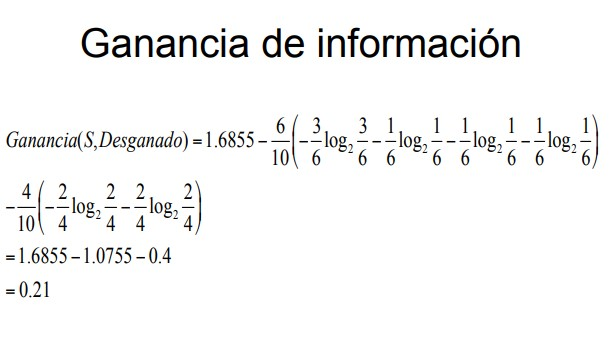

In [ ]:
#@title Desganado
Image("/content/drive/MyDrive/Machine_learning/arboles/desganado.jpg")


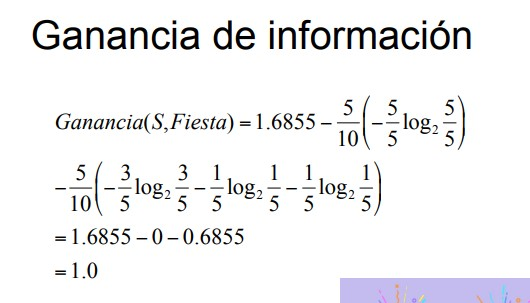

In [ ]:
#@title Fiesta
Image("/content/drive/MyDrive/Machine_learning/arboles/fiesta.jpg")

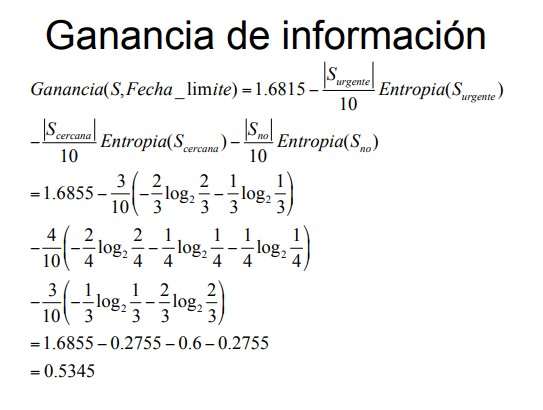

In [ ]:
#@title Fecha límite
Image("/content/drive/MyDrive/Machine_learning/arboles/fecha.jpg")